In [540]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [544]:
df = pd.read_csv('../data/final_df.csv',index_col=0)

In [545]:
df.head()

,series,baker_first,baker_last,technical_winner,technical_top3,technical_bottom,technical_highest,technical_lowest,series_winner,total_episodes_appeared,percent_episodes_appeared,percent_technical_top3,age,occupation,signature,technical,showstopper
0,1,Annetha,Mills,0,1,1,2.0,7.0,0,2,33.333333,50.000000,30,Midwife,['Light Jamaican Black Cakewith Strawberries a...,"[2.0, 7.0]","['Red, White & Blue Chocolate Cake with Cigare..."
1,1,David,Chambers,0,1,3,3.0,8.0,0,4,66.666667,25.000000,31,Entrepreneur,"['Chocolate Orange Cake', 'Cheddar Cheese and ...","[3.0, 8.0, 4.0, 5.0]",['Black Forest Floor Gateaux with Moulded Choc...
2,1,Edward,Kimber,2,4,1,1.0,6.0,1,6,100.000000,66.666667,24,Debt collector for Yorkshire Bank,NaN,NaN,NaN
3,1,Jasminder,Randhawa,0,2,2,2.0,5.0,0,5,83.333333,40.000000,45,Assistant Credit Control Manager,"[""Millionaires' Shortbread"", 'Focaccia', 'Stic...","[2.0, 5.0, 2.0, 4.0]",['Meringues with Chocolate and Space DustCoffe...
4,1,Jonathan,Shepherd,1,1,2,1.0,9.0,0,3,50.000000,33.333333,25,Research Analyst,['Carrot Cake with Lime and Cream Cheese Icing...,"[9.0, 1.0, 6.0]",['Three Tiered White and Dark Chocolate with A...


Once the data is imported, I'll doing some inqury into data types, nulls, etc. 

In [546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   series                     120 non-null    int64  
 1   baker_first                120 non-null    object 
 2   baker_last                 120 non-null    object 
 3   technical_winner           120 non-null    int64  
 4   technical_top3             120 non-null    int64  
 5   technical_bottom           120 non-null    int64  
 6   technical_highest          120 non-null    float64
 7   technical_lowest           120 non-null    float64
 8   series_winner              120 non-null    int64  
 9   total_episodes_appeared    120 non-null    int64  
 10  percent_episodes_appeared  120 non-null    float64
 11  percent_technical_top3     120 non-null    float64
 12  age                        120 non-null    int64  
 13  occupation                 120 non-null    object 

In [547]:
df.dtypes

series                         int64
baker_first                   object
baker_last                    object
technical_winner               int64
technical_top3                 int64
technical_bottom               int64
technical_highest            float64
technical_lowest             float64
series_winner                  int64
total_episodes_appeared        int64
percent_episodes_appeared    float64
percent_technical_top3       float64
age                            int64
occupation                    object
signature                     object
technical                     object
showstopper                   object
dtype: object

In [548]:
df.shape

(120, 17)

In [549]:
df.describe()

,series,technical_winner,technical_top3,technical_bottom,technical_highest,technical_lowest,series_winner,total_episodes_appeared,percent_episodes_appeared,percent_technical_top3,age
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,5.600000,0.775000,2.325000,3.475000,3.316667,8.925000,0.083333,5.916667,62.416667,30.464947,37.391667
std,2.856218,0.991243,2.312416,1.680149,3.305161,2.042253,0.277544,3.085840,31.269140,25.373092,12.896026
min,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,10.000000,0.000000,17.000000
25%,3.000000,0.000000,0.000000,2.000000,1.000000,7.000000,0.000000,3.000000,33.333333,0.000000,28.750000
50%,6.000000,0.000000,2.000000,3.000000,2.000000,9.000000,0.000000,6.000000,64.583333,33.333333,34.000000
75%,8.000000,1.000000,4.000000,5.000000,5.000000,10.250000,0.000000,9.000000,100.000000,50.000000,45.000000
max,10.000000,5.000000,8.000000,7.000000,13.000000,13.000000,1.000000,10.000000,100.000000,80.000000,71.000000


- All rows have data except signature, technical, and showstopper. It seems we have 3 rows of nulls.
- Perhaps series, and final placement should be categories and not integers
- I will remove columns 'percent_technical_top3' and 'percent_episodes_appeared' from the df. These are redundant. 

In [550]:
df.drop(columns=['percent_technical_top3','percent_episodes_appeared'],inplace=True)

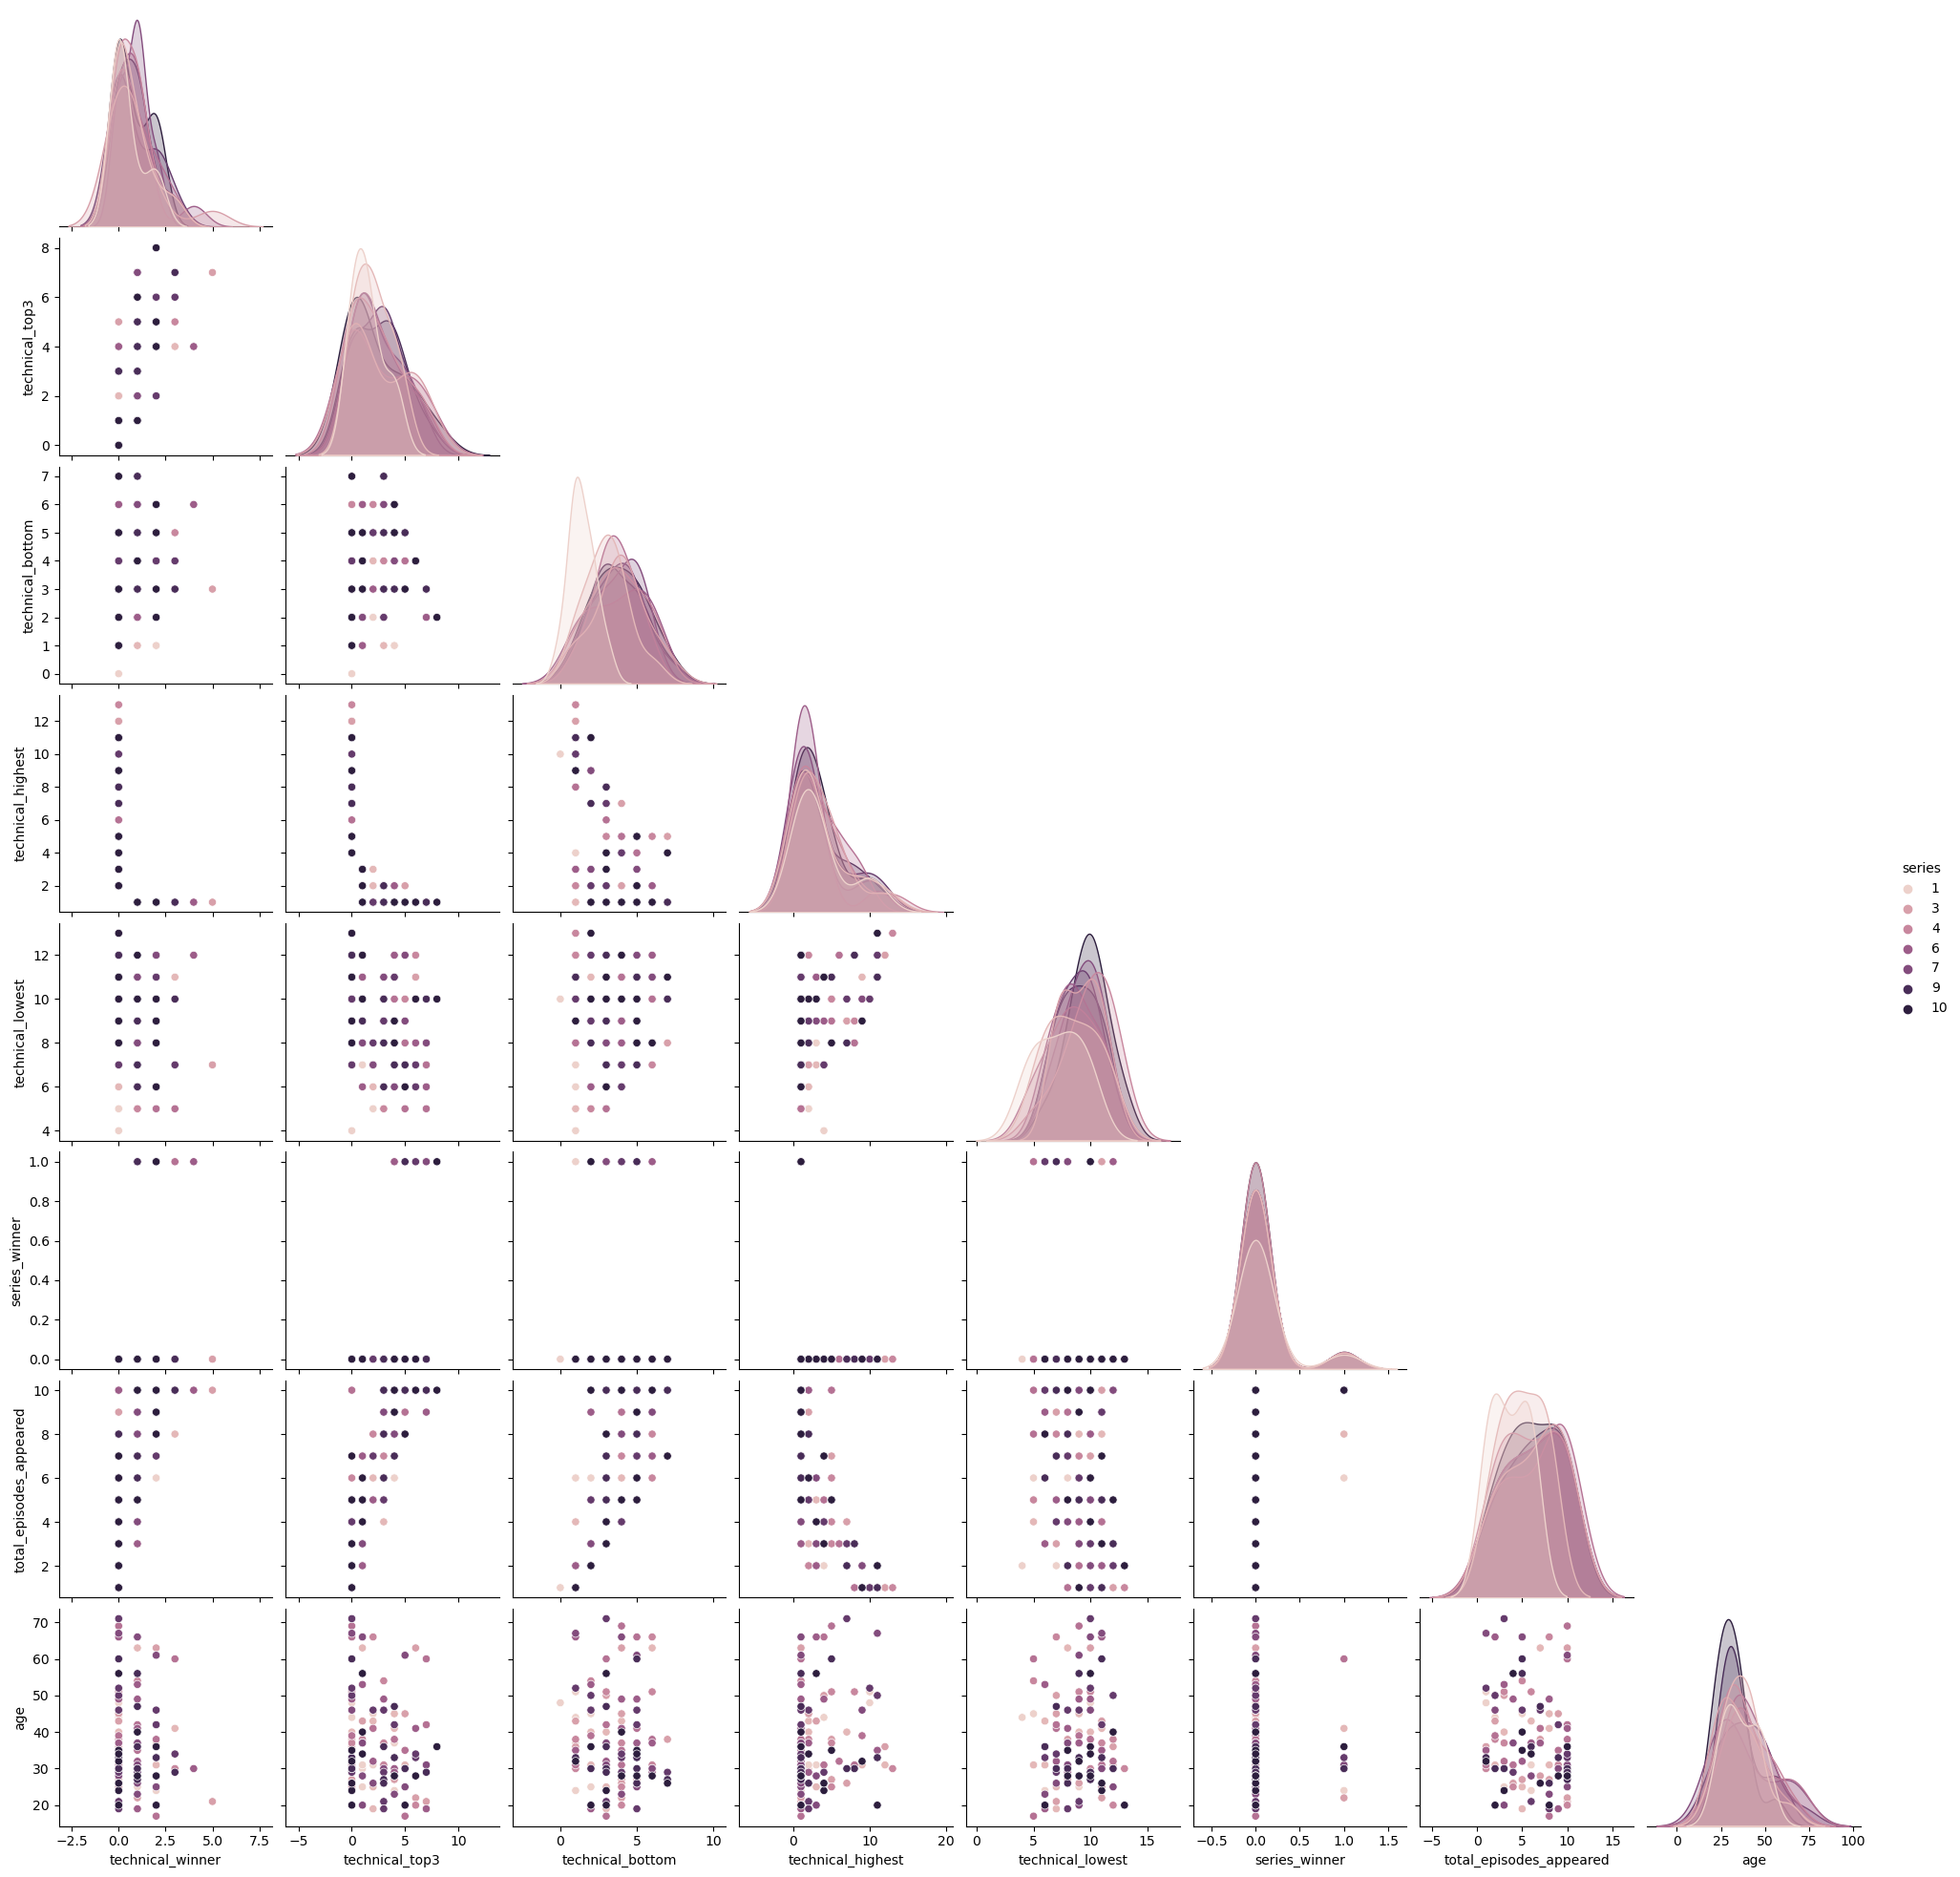

In [525]:
sns.pairplot(df,corner = True,hue='series')
plt.show()

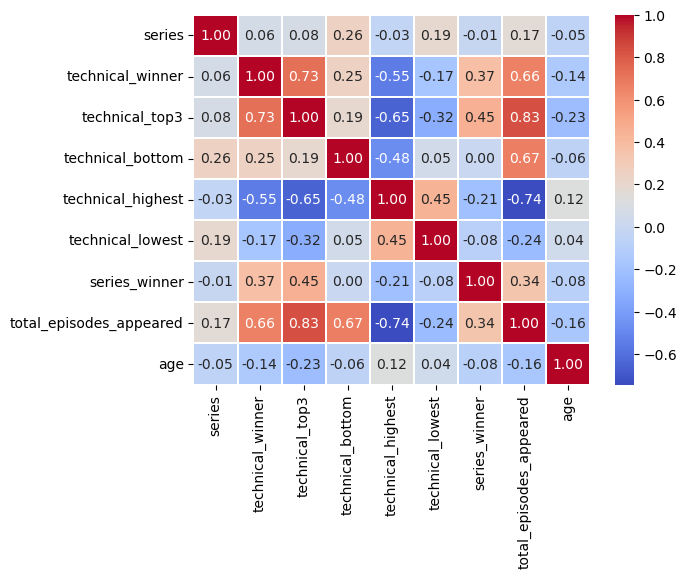

In [526]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt='.2f',linewidths=.05)
plt.show()

New Question- How do signature, technical, and / or showstopper meals/scores affect if contestants win the competition. 

In [551]:
#drop unhelpful columns
df_new = df.drop(columns=['technical_winner','technical_top3','technical_bottom','technical_highest','technical_lowest','total_episodes_appeared'])

#drop rows with NAs in signature/technical or showstopper

df_new = df_new.loc[(df_new.signature.notna()) |(df_new.technical.notna())  |(df_new.showstopper.notna())]

# since we don't have the above information on these season 1 data, I'll just remove remaining season 1 data

df_new = df_new.loc[df_new.series != 1]

#rest index
df_new.reset_index(inplace=True)

#drop old index

df_new.drop(columns='index',inplace=True)
df_new

,series,baker_first,baker_last,series_winner,age,occupation,signature,technical,showstopper
0,2,Ben,Frazer,0,31,Graphic Designer,['Rhubarb and Custard Cupcakes After Dinner Cu...,"[2.0, 1.0, 3.0, 5.0]",['Vanilla Sponge with White Chocolate and Rasp...
1,2,Holly,Bell,0,31,Advertising executive,['Cherry Bakewell Inspired CupcakesGinger Cupc...,"[1.0, 4.0, 6.0, 3.0, 4.0, 3.0, 1.0, 2.0]","['Novelty Farm Cake', 'Milk Chocolate and Pist..."
2,2,Ian,Vallance,0,40,Fundraiser for English Heritage,"['Apple and Cinnamon Cupcakes', 'Stilton, Spin...","[10.0, 2.0, 10.0]","[nan, nan, 'Walnut and Raisin RollsCracked Whe..."
3,2,Janet,Basu,0,63,Teacher of Modern Languages,"['Raspberry and Cream Cupcakes', 'Quiche Print...","[8.0, 8.0, 8.0, 4.0, 1.0, 5.0, 4.0]",['Chocolate Marble Cakewith Dark and White Cho...
4,2,Jason,White,0,19,Civil Engineering Student,['Lemon Meringue CupcakesApple and Cinnamon Cu...,"[6.0, 3.0, 7.0, 1.0, 7.0]","[nan, 'Mint Chocolate TartsBlueberry Bakewell ..."
...,...,...,...,...,...,...,...,...,...
103,10,Michelle,Evans-Fecci,0,35,Print shop administrator,"[""Bara Brith Teulu Ni (Our Family's Bara Brith...","[6.0, 8.0, 5.0, 5.0, 7.0]","['Tŷ Tylwyth Teg (Fairy House Cake)', 'Dewi y ..."
104,10,Phil,Thorne,0,56,HGV driver,"['Spiced Fruit Cake with Rum Glaze', 'Orange, ...","[8.0, 3.0, 10.0, 6.0]","['Retro Rocket Cake', 'Tina the Tortoise', ""Wi..."
105,10,Priya,O'Shea,0,34,Marketing consultant,"['Sunshine Fruit Cake', 'Ruby Barfi Biscuit Ba...","[7.0, 7.0, 4.0, 10.0, 2.0, 7.0]","['Once Upon a Time Cake', 'The Beast of Rocky ..."
106,10,Rosie,Brandreth-Poynter,0,28,Veterinary surgeon,"['Spicy Chai Loaf', 'Virgin Mojito Biscuit Bar...","[2.0, 5.0, 9.0, 4.0, 5.0, 5.0, 1.0, 2.0, 1.0]","['Magical Jungle Cake', 'My Favourite Chicken ..."


In [552]:
#create a function to count the number of words in each baker's signature challenges
def signature_counts(row):
    remove_characters = {"[":"", "'":"", ",":"","]":"",'"':""}
    word_count={}
    for i in row.signature.split():
        for char in remove_characters.keys():
            i = i.replace(char,remove_characters[char])
        if i in word_count:
            word_count[i] +=1
        else:
            word_count[i] = 1

    return (word_count)

In [553]:
df_new['Signature_Word_Count']=df_new.apply(signature_counts,axis=1)

In [554]:
#create a function to count the number of technicals
def technical_counts(row):   
    remove_characters = {"[":"", "'":"", ",":"","]":""}
    tech_count={}
    for i in row.technical.split():
        for char in remove_characters.keys():
            i = i.replace(char,remove_characters[char])
        if i in tech_count:
            tech_count[i] +=1
        else:
            tech_count[i] = 1

    return (tech_count)

In [555]:
df_new['Technical_Count']=df_new.apply(technical_counts,axis=1)

In [556]:
#create a function to count the number of words in each baker's showstopper challenges
def showstopper_counts(row):
    remove_characters = {"[":"", "'":"", ",":"","]":"",'"':""}
    word_count={}
    for i in row.showstopper.split():
        for char in remove_characters.keys():
            i = i.replace(char,remove_characters[char])
        if i in word_count:
            word_count[i] +=1
        else:
            word_count[i] = 1

    return (word_count)

In [557]:
df_new['Showstopper_Word_Count']=df_new.apply(showstopper_counts,axis=1)

In [558]:
df_new[df_new.series_winner ==1]

,series,baker_first,baker_last,series_winner,age,occupation,signature,technical,showstopper,Signature_Word_Count,Technical_Count,Showstopper_Word_Count
5,2,Joanne,Wheatley,1,41,Housewife,['Chocolate Orange CupcakesOrange and Cardamom...,"[11.0, 10.0, 1.0, 8.0, 6.0, 1.0, 3.0, 1.0]","['Chocolate and Strawberry Cake', 'Raspberry a...","{'Chocolate': 1, 'Orange': 1, 'CupcakesOrange'...","{'11.0': 1, '10.0': 1, '1.0': 3, '8.0': 1, '6....","{'Chocolate': 3, 'and': 8, 'Strawberry': 1, 'C..."
16,3,John,Whaite,1,22,Law student,"['Toffee Apple, Orange & Cranberry Upside Down...","[11.0, 1.0, 6.0, 6.0, 2.0, 5.0, 3.0, 3.0, 2.0,...","['Hidden Pink Hearts Cake', 'Fig, Walnut and G...","{'Toffee': 2, 'Apple': 2, 'Orange': 1, '&': 1,...","{'11.0': 1, '1.0': 1, '6.0': 2, '2.0': 3, '5.0...","{'Hidden': 1, 'Pink': 1, 'Hearts': 1, 'Cake': ..."
28,4,Frances,Quinn,1,31,Children's Clothes Designer,"['Giant Jam Sandwich', 'Giant Matchsticks', 'A...","[7.0, 2.0, 8.0, 1.0, 3.0, 2.0, 5.0, 3.0, 2.0, ...","['Secret Squirrel Cake', ""Sailor's Knot"", ""'Ba...","{'Giant': 2, 'Jam': 1, 'Sandwich': 1, 'Matchst...","{'7.0': 1, '2.0': 3, '8.0': 1, '1.0': 1, '3.0'...","{'Secret': 1, 'Squirrel': 1, 'Cake': 4, 'Sailo..."
46,5,Nancy,Birtwhistle,1,60,Retired Practice Manager,"['Coffee and Hazelnut Swiss Roll', 'Fennel and...","[1.0, 2.0, 5.0, 4.0, 4.0, 1.0, 2.0, 3.0, 3.0, ...","['Jaffa Orange Cakes', 'Hansel and Gretel Scen...","{'Coffee': 2, 'and': 7, 'Hazelnut': 1, 'Swiss'...","{'1.0': 3, '2.0': 2, '5.0': 1, '4.0': 2, '3.0'...","{'Jaffa': 1, 'Orange': 1, 'Cakes': 1, 'Hansel'..."
55,6,Nadiya,Hussain,1,30,Full-time mother,"['Orange and Green Cardamom Madeira Cake', 'Co...","[12.0, 9.0, 9.0, 8.0, 1.0, 4.0, 1.0, 1.0, 4.0,...","['Quadruple Chocolate Black Forest Gâteau', 'B...","{'Orange': 1, 'and': 8, 'Green': 1, 'Cardamom'...","{'12.0': 1, '9.0': 2, '8.0': 1, '1.0': 4, '4.0...","{'Quadruple': 1, 'Chocolate': 2, 'Black': 1, '..."
63,7,Candice,Brown,1,31,PE teacher,['Raspberry and Rhubarb Drizzle Custard Bundt ...,"[5.0, 8.0, 3.0, 2.0, 2.0, 5.0, 2.0, 1.0, 3.0, ...","['Mirror Mirror On The Wall, Who Is The Shinie...","{'Raspberry': 1, 'and': 7, 'Rhubarb': 1, 'Driz...","{'5.0': 2, '8.0': 1, '3.0': 2, '2.0': 4, '1.0'...","{'Mirror': 2, 'On': 1, 'The': 2, 'Wall': 1, 'W..."
79,8,Sophie,Faldo,1,33,Former army officer and trainee stuntwoman,"['Pineapple and Coconut Sandwich Cake', 'Lemon...","[5.0, 2.0, 6.0, 4.0, 1.0, 2.0, 3.0, 4.0, 1.0, ...","[""'Champagne Bottle and Bucket' Cake"", ""'Snake...","{'Pineapple': 1, 'and': 3, 'Coconut': 1, 'Sand...","{'5.0': 1, '2.0': 3, '6.0': 1, '4.0': 2, '1.0'...","{'Champagne': 1, 'Bottle': 1, 'and': 2, 'Bucke..."
92,9,Rahul,Mandal,1,30,Research scientist,"['Fennel and Coconut Pitcaithly Bannock', 'Lem...","[7.0, 2.0, 4.0, 4.0, 3.0, 3.0, 1.0, 5.0, 4.0, ...","['""First Spring in the UK""', 'Chocolate Orange...","{'Fennel': 1, 'and': 7, 'Coconut': 1, 'Pitcait...","{'7.0': 1, '2.0': 2, '4.0': 3, '3.0': 2, '1.0'...","{'First': 1, 'Spring': 1, 'in': 1, 'the': 1, '..."
98,10,David,Atherton,1,36,International health adviser,"['Squishy Squashy Fruit Cake', 'Coco-nutty Cho...","[10.0, 2.0, 2.0, 2.0, 9.0, 2.0, 2.0, 1.0, 2.0,...","['Snakey Birthday Cakey', 'Wedding Spray', 'Tr...","{'Squishy': 1, 'Squashy': 1, 'Fruit': 1, 'Cake...","{'10.0': 1, '2.0': 6, '9.0': 1, '1.0': 2}","{'Snakey': 1, 'Birthday': 1, 'Cakey': 1, 'Wedd..."


In [559]:
#create a function that gives us the number of words per signature
def counts(row):
    sig = sum(row.Signature_Word_Count.values())
    tech = sum(row.Technical_Count.values())
    return sig/tech

In [560]:
df_new['words_per_signature'] = df_new.apply(counts,axis=1)

In [561]:
#create a function that gives us the number of words per showstopper
def counts(row):
    show = sum(row.Showstopper_Word_Count.values())
    tech = sum(row.Technical_Count.values())
    return show/tech

In [562]:
df_new['words_per_showstopper'] = df_new.apply(counts,axis=1)

In [677]:
df_new[df_new.technical in ]

,series,baker_first,baker_last,series_winner,age,occupation,signature,Signature_Word_Count,words_per_signature,technical,Technical_Count,showstopper,Showstopper_Word_Count,words_per_showstopper
0,2,Ben,Frazer,0,31,Graphic Designer,['Rhubarb and Custard Cupcakes After Dinner Cu...,"{'Rhubarb': 1, 'and': 3, 'Custard': 1, 'Cupcak...",5.000000,"[2.0, 1.0, 3.0, 5.0]","{'2.0': 1, '1.0': 1, '3.0': 1, '5.0': 1}",['Vanilla Sponge with White Chocolate and Rasp...,"{'Vanilla': 1, 'Sponge': 1, 'with': 1, 'White'...",4.750000
1,2,Holly,Bell,0,31,Advertising executive,['Cherry Bakewell Inspired CupcakesGinger Cupc...,"{'Cherry': 1, 'Bakewell': 1, 'Inspired': 2, 'C...",4.750000,"[1.0, 4.0, 6.0, 3.0, 4.0, 3.0, 1.0, 2.0]","{'1.0': 2, '4.0': 2, '6.0': 1, '3.0': 2, '2.0'...","['Novelty Farm Cake', 'Milk Chocolate and Pist...","{'Novelty': 1, 'Farm': 1, 'Cake': 1, 'Milk': 1...",6.875000
2,2,Ian,Vallance,0,40,Fundraiser for English Heritage,"['Apple and Cinnamon Cupcakes', 'Stilton, Spin...","{'Apple': 1, 'and': 4, 'Cinnamon': 1, 'Cupcake...",6.666667,"[10.0, 2.0, 10.0]","{'10.0': 2, '2.0': 1}","[nan, nan, 'Walnut and Raisin RollsCracked Whe...","{'nan': 2, 'Walnut': 1, 'and': 1, 'Raisin': 1,...",2.666667
3,2,Janet,Basu,0,63,Teacher of Modern Languages,"['Raspberry and Cream Cupcakes', 'Quiche Print...","{'Raspberry': 1, 'and': 3, 'Cream': 1, 'Cupcak...",3.857143,"[8.0, 8.0, 8.0, 4.0, 1.0, 5.0, 4.0]","{'8.0': 3, '4.0': 2, '1.0': 1, '5.0': 1}",['Chocolate Marble Cakewith Dark and White Cho...,"{'Chocolate': 2, 'Marble': 1, 'Cakewith': 1, '...",5.714286
4,2,Jason,White,0,19,Civil Engineering Student,['Lemon Meringue CupcakesApple and Cinnamon Cu...,"{'Lemon': 1, 'Meringue': 1, 'CupcakesApple': 1...",4.600000,"[6.0, 3.0, 7.0, 1.0, 7.0]","{'6.0': 1, '3.0': 1, '7.0': 2, '1.0': 1}","[nan, 'Mint Chocolate TartsBlueberry Bakewell ...","{'nan': 2, 'Mint': 1, 'Chocolate': 1, 'TartsBl...",3.400000


In [708]:
for i in df_new.technical:
    print (i)

[2.0, 1.0, 3.0, 5.0]
[1.0, 4.0, 6.0, 3.0, 4.0, 3.0, 1.0, 2.0]
[10.0, 2.0, 10.0]
[8.0, 8.0, 8.0, 4.0, 1.0, 5.0, 4.0]
[6.0, 3.0, 7.0, 1.0, 7.0]
[11.0, 10.0, 1.0, 8.0, 6.0, 1.0, 3.0, 1.0]
[12.0]
[4.0, 9.0, 5.0, 2.0, 2.0, 4.0, 2.0, 3.0]
[3.0, 5.0, 4.0, 7.0, 3.0]
[9.0, 11.0]
[7.0, 7.0, 9.0]
[5.0, 6.0, 2.0, 6.0, 5.0, 2.0]
[10.0, 4.0, 9.0, 1.0, 3.0, 1.0, 4.0, 2.0, 3.0, 2.0]
[5.0, 8.0, 3.0, 3.0, 1.0, 3.0, 5.0, 5.0]
[7.0, 3.0, 2.0, 2.0, 7.0, 2.0, 2.0, 4.0, 4.0]
[2.0, 2.0, 1.0, 5.0, 6.0, 7.0, 1.0, 1.0, 1.0, 1.0]
[11.0, 1.0, 6.0, 6.0, 2.0, 5.0, 3.0, 3.0, 2.0, 2.0]
[6.0, 6.0, 10.0, 9.0, 5.0]
[12.0]
[3.0, 11.0]
[8.0, 5.0, 5.0, 7.0, 8.0, 6.0, 6.0]
[1.0, 10.0, 8.0, 4.0, 4.0, 4.0, 7.0]
[9.0, 9.0, 7.0, 8.0]
[4.0, 7.0, 4.0]
[11.0, 9.0, 5.0, 8.0]
[8.0, 11.0, 10.0, 2.0, 5.0, 6.0, 1.0, 4.0, 3.0]
[3.0, 4.0, 4.0, 7.0, 1.0, 4.0, 6.0, 5.0]
[9.0, 8.0, 9.0]
[7.0, 2.0, 8.0, 1.0, 3.0, 2.0, 5.0, 3.0, 2.0, 3.0]
[4.0, 7.0, 1.0, 9.0, 2.0, 5.0, 3.0]
[6.0, 10.0, 7.0, 5.0, 8.0, 7.0]
[10.0, 1.0, 6.0, 4.0, 7.0, 3.0, 4.0, 2

In [673]:
#create a function that gives average technical score
def avg_score(row):
    num = sum(row.Technical_Count.keys())
    denom = sum(row.Technical_Count.values())
    return num/ denom

In [674]:
df_new.apply(avg_score,axis=1)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [663]:
word_count={}
for s in df_new.series:
    word_count[s] = {}
    for k,v in df_new.loc[df_new.series == s].Signature_Word_Count.items():
        for k1,v1 in v.items():
            if k1 in word_count[s]:
                word_count[s][k1] += v1
            else:
                word_count[s][k1] = v1
wc_df = pd.DataFrame.from_dict(word_count,orient = 'index')
wc_df = wc_df.reset_index()
wc_df = wc_df.melt(id_vars='index',var_name="recipe_word", value_name = 'count')
wc_df.rename(columns={'index':'season'},inplace=True)
wc_df.sort_values(by = ['season','count'],ascending =[True,False])

,season,recipe_word,count
9,2,and,38.0
27,2,Cupcakes,12.0
81,2,Quiche,10.0
117,2,Loaf,9.0
288,2,Pie,7.0
...,...,...,...
7613,10,Your,NaN
7622,10,Own,NaN
7631,10,Dulce,NaN
7640,10,De,NaN


0       False
1       False
2       False
3       False
4       False
        ...  
8401    False
8402    False
8403    False
8404    False
8405    False
Name: count, Length: 8406, dtype: bool

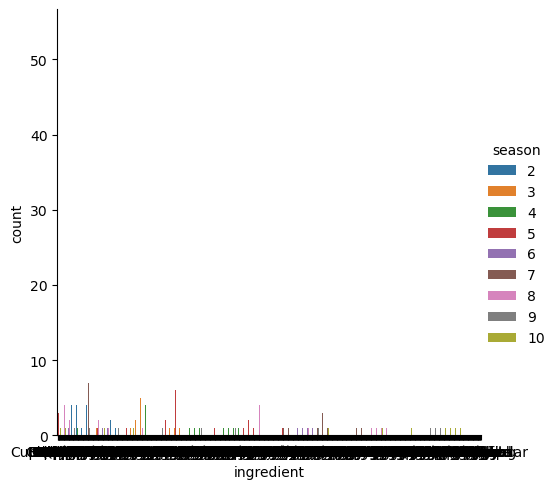

In [662]:
sns.catplot(kind='bar',data=wc_df,x='ingredient',y='count',hue='season')
plt.show()

#we need to clean up some of these entries#
replaced:
- ChaussonsPain: Chaussons Pain
- MacaronsMiniature: Macarons Miniature
- Cupcakeswith :Cupcakes with 
- BreadChorizo :Bread Chorizo 
- & : and 
- Trifle*: Trifle
- CreamsApricot: Creams Apricot
- FriandsLime: Friands Lime
- BaklavaBreakfast: Baklava Breakfast
- RotisGarlic: Rotis Garlic
- NaanGarlic : Naan Garlic 
- NaanBannock: Naan Bannock
- Madeleines\nOrange: Madeleines Orange
- FlatbreadsItalian: Flatbreads Italian 
- BaklavaHalwa: Baklava Halwa 
- MadeleinesWhite : Madeleines White 
- TartletsChocolate : Tartlets Chocolate
- Cakewith: Cake with
- TortillasZaatar : Tortillas Zaatar
- FoursChilli: Fours Chilli
- Canapés\n(Chantenay: Canapés (Chantenay
- Madeleines\nEspresso: Madeleines Espresso
- ProfiterolesSteamed : Profiteroles Steamed
- withSalted: with Salted
- ChocolatPain: Chocolat Pain
- withSalted: with Salted
- CupcakesAfter: Cupcakes After
- PuddingsSticky: Puddings Sticky
- andCaramelised:and Caramelised
- FlatbreadsGarlic: Flatbreads Garlic
- PuddingsRaspberry: Puddings Raspberry
- Puddingwith: Pudding with
- PuddingsGranny's: Puddings Granny's
- Cake\nwith: Cake with
- CupcakesOrange: Cupcakes Orange
- CupcakesAfter: Cupcakes After 
- PuddingsSticky: Puddings Sticky
- CupcakesGinger : Cupcakes Ginger 

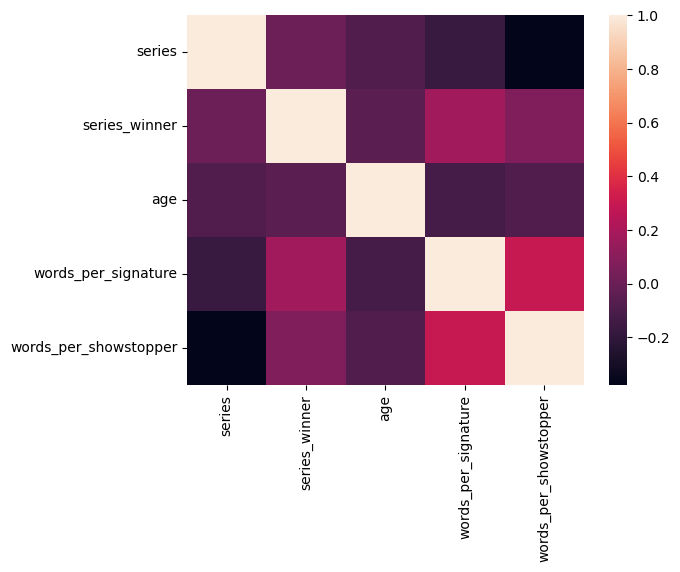

In [576]:
sns.heatmap(df_new.corr())
plt.show()

In [573]:
#reorder the columns to have word counts next to each column
df_new=df_new.reindex(columns= ['series','baker_first','baker_last','series_winner','age','occupation','signature','Signature_Word_Count','words_per_signature','technical','Technical_Count','showstopper','Showstopper_Word_Count','words_per_showstopper'])

In [ ]:
plt.clf()
sns.heatmap(df_new.corr(),cmap="coolwarm")
plt.show()

Notes:
average word usage per episode   